In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import random

%matplotlib inline

**Note:**  This Jupyter notebook is a slightly shortened version of "HT&GT.ipynb" found at this GitHub repository __[here](https://github.com/craw-daddy/Introductory-DS)__.

## Statistical Hypothesis Testing


Hypothesis testing typically involves comparing two datasets to look for a statistical relationship between the two datasets.  In other cases, testing will involve a dataset versus an "idealized" dataset.  

### Examples of hypothesis testing
1.  Is the mean height of Scandinavian men the same as the mean height of other European (non-Scandinavian) men?  
2.  Are the number of males/females fined for speeding in New York "significantly different" than male/female arrests for speeding in Massachusetts in 2017?  (This is essentially asking if the number of fines is independent of gender and location.)
3.  A certain machine for manufacturing cardboard boxes is supposed to manufacture ones that are 1/5" thick.  A quality control technician in the company checks a sample of the output to test if the thickness is smaller than this desired target (meaning the boxes will be too weak).  
4.  When making tea, is there is a difference in taste whether the tea is added to the cup first, or the milk is added to the cup first?  (A somewhat famous example described by Ron Fisher who helped lay the foundations of statistical hypothesis testing.  Dr. Muriel Bristol, a colleague of Fisher, claimed to be able to tell which was added first.)  

### Null hypothesis and alternative hypothesis

$H_O$:  The null hypothesis, assumed to be true.  

$H_A$:  The alternative hypothesis, accepted if the samples/observations support this hypothesis "with sufficient evidence".  


For some of the examples given above, $H_O$ and $H_A$ might be stated as follows:
1. $H_O$: $\mu_S = \mu_E$ where $\mu_S$ is the mean height of Scandinavian men and $\mu_E$ is the mean height of other European (non-Scandinavian) men.

   $H_A$: $\mu_S \not= \mu_E$  
<br>
2.  $H_O$:  The frequency of speeding fines is independent of gender and location.  

    $H_A$:  The frequency of speeding fines is not independent of gender and/or location.      
<br>
3.  $H_O$:  $\mu = 0.20$ where $\mu$ is the mean thickness of the boxes in inches.

    $H_A$:  $\mu < 0.20$

###  Common assumptions about samples/observations
1.  Samples come from a normal distribution, or at least one that is symmteric.  Alternatively, the number of samples should be high enough (at least $30$) so that the "Law of Large Numbers", i.e. the Central Limit Theorem applies.  
2.  Samples are independent from one another.
3.  For multiple datasets, it is typically assumed they have a common variance.  (That itself could constitute another hypothesis test.)  

(Other assumptions might be used if data is categorical in nature.)


### Test statistic 

The test statistic summarizes the dataset(s) into one value that can be used to (try to) distinguish the null hypothesis from the alternative hypothesis.  

Common test statistic distributions:  Student's t distribution, normal distribution (using Law of Large Numbers with known variance), $\chi^2$ distribution

### Significance level
The significance level, $\alpha$, is the probability threshold below which the null hypothesis will be rejected.  What this means is the following:  Assume the null hypothesis is true, and let $T$ denote the test statistic that will be used in the test.  The significance level partitions the possible values of $T$ into regions where the null hypothesis will be rejected (the _critical region_), and those where it will not be rejected.  (E.g. for a normal distribution, the critical region will be the tail(s) of the distribution.)  The probability of the critical region is equal to $\alpha$.  Typical values for $\alpha$ are $0.05$ and $0.01$.  
<img src="significance.png" alt="Graph chowing critical region" title="Critical region" />

### Procedure of the test
1.  Having chosen the test statistic $T$, and the significance level $\alpha$, we compute the observed value of $T$ using the samples/observations in our dataset.  Call this value $t_{obs}$.  
2.  Check if $t_{obs}$ lies in the critical region.  If so, we reject the null hypothesis in favor of the alternative hypothesis.  If not, we cannot reject the null hypothesis.  
3.  Equivalently, the value of the test statistic corresponds to a $p$-value, which is the probability of that value $t_{obs}$ occurring, assuming that the null hypothesis is true.  If the $p$-value is smaller than or equal to the significance level, we reject the null hypothesis in favor of the alternative hypothesis.  

### Errors in hypothesis testing
It is possible that we make an error in hypothesis testing, e.g. rejecting the null hypothesis incorrectly or failing
to reject the null hypothesis when it is not the truth (but the samples we have do not support rejecting it).  

A common analogy used in hypothesis testing is to a criminal trial.  In most countries, a defendant on trial is presumed to be innocent (the "null hypothesis").  The evidence presented during the course of a trial is analogous to the samples taken in a statistical test.  If the evidence is sufficiently persuasive, the jury can find the defendant guilty (the "alternative hypothesis").  If the evidence is not persuasive, the defendant is found "not guilty".  It's possible, of course, that the jury's decision is wrong.  

<table border="2" width="0" style="text-align:center; font-size=14">
    <tr><th></th><th colspan="2" style="text-align: center">Truth</th></tr>
    <tr style="text-align:center">
        <th>(Jury) Decision</th>
        <td style="text-align:center">_Not Guilty_<br>_(Null Hypothesis)_</td>
        <td style="text-align:center">_Guilty_<br>_(Alternative Hypothesis)_</td>
    </tr>
    <tr>
        <th>Not Guilty<br>(Accept Null Hypothesis)</th>
        <td style="text-align:center">Ok</td>
        <td style="text-align:center">Error<br>(**Type II Error**)</td>
    </tr>
    <tr>
        <th>Guilty<br>(Accept Alternative Hypothesis)</th>
        <td style="text-align:center">Error<br>(**Type I Error**)</td>
        <td style="text-align:center">Ok</td>
    </tr>
</table>

In hypothesis testing, as in jury trials, we want to minimize the "conviction of an innocent person", or the incorrect rejection of the null hypothesis (the "Type I Error").  There is an asymmetry in that lowering the chances of a Type I error magnifies the chances of a Type II error occurring.  

**Note: The significance level $\alpha$ is the (highest) probability of a Type I Error occurring.**  

In [2]:
#  Cardboard box samples
samples=[0.1803, 0.2160, 0.1622, 0.2277, 0.2253, 0.1809, 0.1765, 0.1861, 0.1814, 0.1698, 
         0.1853, 0.2086, 0.1839, 0.1783, 0.1814, 0.1565, 0.2127, 0.1811, 0.1718, 0.2089, 
         0.2067, 0.1614, 0.1690, 0.1812, 0.2172, 0.1555, 0.1623, 0.1887, 0.2069, 0.1676, 
         0.1845, 0.1859, 0.1917, 0.2170, 0.1943, 0.1813, 0.2017, 0.2097, 0.1737, 0.2076]

print(len(samples))
print(np.mean(samples))

40
0.188465


Since we only have the samples in hand, with no before-hand knowledge about the variance
of the distribution, we perform a one-sample, one-sided t-test.  

In this case we compute $(\bar{X}-\mu)/(s/\sqrt{n})$, where $\bar{X}$ is the sample mean, $s$ is the sample standard deviation, $n$ is the number of samples, and $\mu$ is the (assumed) mean of the distribution (from the null hypothesis).  We compare this to the Student's $t$-distribution with $n-1$ degrees of freedom.  

In [3]:
alpha = 0.05

#  Perform the t-test.
(statistic, p_value) = stats.ttest_1samp(samples, 0.20)

In [4]:
#  Note that, by default, Python performs a two-sided t-test.  
#  To get the one-sided test we want, we reject the null hypothessis if and only if
#  the test statistic is negative (based on the alternative hypothesis), 
#  and we have p_value/2 < alpha.  

print(statistic)
print(p_value/2 < alpha)

-3.72303812077
True


So in this case we reject the null hypothesis in favor of the alternative hypothesis ($\mu < 0.20$). 

Alternatively, we can find the "critical value", where if the test statistic is less than this value, we reject the null hypothesis.  Since this is a one-sided test, we want the value of the test statistic where 5% of the cdf is below this value.  

In [5]:
t_var = stats.t(len(samples)-1)
t_critical = t_var.ppf(0.05)  #  "Invert" the cdf to find the critical value.  

print(t_critical)
print(statistic < t_critical)

-1.6848751195
True


Since the value of the test statistic is less than this critical value, we reject the null hypothesis.  

<a id="intro"></a>
## Bayes' Theorem  (Introduction)

Bayes' Theorem (or Bayes' Rule) is used to describe the probability of an event, given other knowledge related to that event. It is a way to update our (probabilistic) beliefs as new information is revealed.

As a simple example, consider the case of a mother who has two children.  
Assuming that it is equally likely that each child is a girl or a boy, consider these questions:  

 - What is the probability that both of the mother's children are girls?  
 - If I tell you that at least one of the children is a girl, what is the probability that both children are girls?
 - If I tell you that the eldest child is a girl, what is the probability that both children are girls?  
 
These answers are, respectively, $\frac{1}{4}$, $\frac{1}{3}$, and $\frac{1}{2}$, so additional information about the mother's children changes our assessment of these probabilities.  (See [answers](#mother) at the end of this lesson if you are unfamiliar with this solution.)  


### Bayesian inference
Bayesian inference is the use of Bayes' Theorem to update the probability of a hypothesis as more evidence becomes available.  Also used to infer values of parameters of probability distributions from observations.

### Applications of Bayes' Theorem and Bayesian Inference
1. Medical testing
2. Spam (email) detection
3. Weather prediction
4. Estimating parameters for probability distributions
5. Cracking the Enigma Code
6. The famous ``Monty Hall'' problem  (Do you win the car or the goat?)

#### An example
Suppose after a horrible week of upset stomachs, little sleep, pain, and weak knees, you go to the doctor.  After running a variety of tests, the doctor tells you that you have a life-threatening disease?  Should you be worried? 

You need more information in order to decide if you should be (very) concerned or not, so asking the doctor, she tells you the following pieces of information about this disease and the testing method:
 - For people who have the disease, the test will correctly detect this 99% of the time.  (The _sensitivity_ is 99%.)
 - For people without the disease, the test will correctly conclude this 99% of the time.  (The _specificity_ is 99%.)
 - It is believed (estimated) that 0.1% of people have this disease. 
 
Letting D denote the event that you have the disease, and P denoting the event that you test positive for having the disease, we are trying to determine this quantity: 
<div class="alert alert-block alert-warning">$Pr(D \mid P)$ = the probability that you have the disease, given that you test positive for it</div>

Before getting to the statement of Bayes' Theorem, let's solve this problem "by hand".  

 - In population of 1000 people, we expect there will be one person with this disease, i.e. $1000 \times 0.001 = 1$.

 - For this one person with the disease, the test will be correct with probability $1\times 0.99 \approx 1$, so the test will correctly identify this person.  

 - Out of the 999 people without the disease, the test will incorrectly test positive for (about) $999\times 0.01 \approx 10$ of them.  
 
Thus, there are eleven people that test positive, but only one of them has the disease, so the chances that you have
the disease, given that you test positive is about $1/11 \approx 9\%$.  

**Conclusion:**  If it was me, I would be worried enough to get tested again (by another doctor, who uses a different lab to process the test).

## Bayes' Theorem
Let A and B denote two events, where $Pr(B) > 0$.  Bayes' Theorem allows us to express $Pr(A\mid B)$ (the probability that A happens, given that B has happened) in terms of other probabilities.  

$$Pr(A \mid B) = \frac{Pr(B \mid A)\cdot Pr(A)}{Pr(B)}$$

###  Some terminology and assumptions
$Pr(A \mid B)$, the conditional probability that the event $A$ happens given the evidence that $B$ has occurred, is typically called the _posterior probability_.  The quantity $P(A)$ is usually called the _prior probability_, and $Pr(B\mid A)$ is often called the _likelihood_.  

Implicit in the use of Bayes' Theorem are the assumptions that the posterior probability and the likelihood are known quantities (or we have very good estimates).  If we gain additional knowledge that the prior probability or the likelihood has somehow changed, we would use them to update $Pr(A\mid B)$ accordingly. 

#### Our example
We want to compute $Pr(D\mid P)$.  
To apply Bayes' Theorem we need our other probabilities, $Pr(P \mid D)$, $Pr(D)$, and $Pr(P)$.

In [6]:
# The likelihood  Pr(P | D)
p_Pos_given_Disease = 0.99

#  The prior probability  Pr(D)
p_Disease = 0.001

Finding $Pr(P)$ is the slightly tricky one here.  This uses the so-called "Law of Total Probability".  

In [7]:
p_Pos = 0.001*0.99 + 0.999*0.01

Then we apply Bayes' Theorem.  

In [8]:
p_Disease_given_Pos = p_Pos_given_Disease * p_Disease / p_Pos

print(p_Disease_given_Pos)

0.09016393442622951


<a id="second-test"></a>
### The second test
Suppose having tested positive for the disease, you go for a second test, which is positive again.

What's your estimation now of the probability you have the disease?  (See [end](#second-test-answer) for answer.)

### Bayesian inference

Bayes' Theorem can be used to estimate parameters of probability distributions, given an assumption about the underlying distribution.  

For example, coin flipping can be represented by a Bernoulli random variable with a (possibly unknown) parameter $P$, which equals the probability of obtaining a "heads" in one flip.  Our goal might be to estimate the parameter $P$ based on observed evidence of coin flips.  

Recall that repeated Bernoulli trials corresponds to the binomial distribution, giving the probability of $k$ "successes" in $n$ trials, where success happens with probability $P$.  The binomial probability mass function has this expression:
$$Pr(k;n,P) = {n \choose k}P^k(1-P)^{n-k}.$$

As stated, we want to use Bayes' Theorem to help us estimate $P$.  Bayes' Theorem tells us that

$$Pr(P=p\mid heads) \propto Pr(heads \mid P=p)\cdot Pr(P=p)$$

where "$\propto$" means "proportional to".  We know that $Pr(heads \mid P=p) = p$, so if we know (or could "guess") a possible distribution for the random variable $P$, we could update our knowledge about $P$ given new evidence of an observed coin flip.

In this case the "right" probability distribution to try for $P$ is the Beta distribution, denoted $\mathbb{B}(\alpha,\beta)$, which is a distribution on the interval $[0,1]$ with the probability density function 

$$p(x) = \frac{x^{\alpha-1}(1-x)^{\beta-1}}{B(\alpha,\beta)}.$$

Here $B(\alpha,\beta)$ denotes the Beta function, which is the normalizing constant that makes this a probability distribution.  

Our application of Bayes' Theorem becomes:

$$
 \begin{align}
 Pr(P=p\mid heads) & \propto\,\, Pr(heads \mid P=p)\cdot Pr(P=p) \\
                   & \propto\,\, p\cdot p^{\alpha-1}(1-p)^{\beta-1} \\
                   & \propto\,\, p^{\alpha}(1-p)^{\beta-1}.
 \end{align}
$$

It isn't too difficult to show that 
$$Pr(P=p \mid heads) = \mathbb{B}(\alpha+1,\beta),$$
and similarly that
$$Pr(P=p \mid tails) = \mathbb{B}(\alpha, \beta+1).$$

In other words, if $P$ (the prior) is distributed according to the Beta distribution $\mathbb{B}(\alpha,\beta)$, then the _new_ distribution of $P$ (the posterior) is a Beta distribution that depends upon observing a "heads" or "tails" of the new coin flip, either $\mathbb{B}(\alpha+1,\beta)$ or $\mathbb{B}(\alpha,\beta+1)$, respectively.  

**Terminology:** With the assumption that the prior of $P$ is the Beta distribution, and the posterior for $P$ is another Beta distribution (with different parameters) we say that the Beta distribution is a "conjugate prior" for Bernoulli trials. 

From the properties of the Beta distribution, we know that $\mathbb{E}(\mathbb{B}(\alpha,\beta))=\frac{\alpha}{\alpha+\beta}$.  
Therefore, we have that our prior probability is $P=Pr(heads) = \frac{\alpha}{\alpha+\beta}$.  Observations make us readjust this belief about $P$ for every coin flip we observe.  

If we observe a "heads", we want to adjust $P$ upwards, and observing "tails" makes us adjust $P$ downwards.  We do this by changing the parameters of the Beta distribution as noted above. 

As the number of observations increases, our estimate for P should get better.

In [9]:
P = 0.8

alpha = 1
beta = 1
l = [] 
dists = []

for k in range(101):
    estP = alpha/(alpha+beta)
    if k % 10 == 0:
        l.append([alpha, beta, round(estP,4)])
        dists.append(stats.beta(a=alpha,b=beta))
    r = random.random()
    if r <= P:
        alpha = alpha+1
    else:
        beta = beta+1

print(l)
print(round(alpha/(alpha+beta),4))

[[1, 1, 0.5], [10, 2, 0.8333], [18, 4, 0.8182], [26, 6, 0.8125], [36, 6, 0.8571], [45, 7, 0.8654], [53, 9, 0.8548], [61, 11, 0.8472], [70, 12, 0.8537], [77, 15, 0.837], [84, 18, 0.8235]]
0.8155


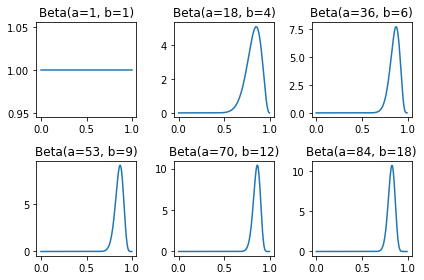

In [10]:
plt.figure()
for k, d in enumerate(dists[0::len(dists)//5]):
    ax=plt.subplot(2,3,k+1)
    xPoints = np.arange(0,1,1/200)
    ax.plot(xPoints, d.pdf(xPoints))
    ax.set_title("Beta(a={a}, b={b})".format(**d.kwds))
plt.tight_layout()

<a id="coin-example"></a>
####  Estimation the probability of "heads"
Suppose we are examining another coin.  What's the estimate for p, the probability of a "heads" for this coin, when we are given this list of 150 coin tosses?  (See answer [below](#coin-example-answer).)

In [11]:
ht = ['H','T','H','H','T','T','T','H','H','T','T','T','H','T','T',
      'T','T','H','H','H','T','H','T','T','T','T','H','H','H','T',
      'T','T','H','H','T','H','T','T','H','H','H','H','T','T','H', 
      'H','H','T','T','H','H','H','T','T','T','T','T','H','T','H',
      'H','T','H','T','T','T','T','T','H','T','T','T','H','T','T',
      'H','T','T','H','T','T','H','T','T','T','T','H','T','T','H',
      'T','H','H','T','H','T','T','T','H','T','T','T','T','H','H',
      'T','T','T','H','H','T','T','T','H','H','T','H','T','H','T', 
      'T','T','H','T','H','T','T','T','T','T','H','T','T','T','T',
      'H','H','T','T','T','H','H','T','H','T','T','H','T','T','H']

### Answers to qustions asked

<a id="mother"></a>
#### A mother's children (solution)

There are four possibilities for the mother's two children, GG, GB, BG, and BB (given in birth order).  Assuming that B and G are equally likely, then these four possibilities are also equally likely.  Hence, with no information, we see the probability that the mother has two girls is $1/4$.  

If we are told that at least one child is a girl, this eliminates the BB option, leaving three equally likely options, so the probability that she has two girls is $1/3$.

Finally, if we are told that the eldest child is a girl, this leaves only the two choices $GG$ and $GB$, each equally likely, so the probability she has two girls is $1/2$.

[[Back to Introduction to Bayes' Thm](#intro)]

<a id="second-test-answer"></a>
#### The second test (solution)
Suppose having tested positive for the disease, you go for a second test, which is positive again.

What's your estimation now of the probability you have the disease?

The first test (effectively) alters the prior probability $Pr(D)$, from 0.1% to (about) 9%.  This isn't quite accurate, but is close enough for a good estimate.

In [12]:
# New prior
p_Disease = 0.09

# New denominator, since the prior has been updated (given the positive test)
p_Pos = 0.09*0.99+0.91*0.01

p_Disease_given_Pos = p_Pos_given_Disease * p_Disease / p_Pos
print(p_Disease_given_Pos)

0.9073319755600815


So now you're about 91% positive that you have the disease. 

[[Back to "The second test"](#second-test)]

<a id="coin-example-answer"></a>
#### Estimating the probability of "heads" (solution)

In [13]:
ht = ['H','T','H','H','T','T','T','H','H','T','T','T','H','T','T',
      'T','T','H','H','H','T','H','T','T','T','T','H','H','H','T',
      'T','T','H','H','T','H','T','T','H','H','H','H','T','T','H', 
      'H','H','T','T','H','H','H','T','T','T','T','T','H','T','H',
      'H','T','H','T','T','T','T','T','H','T','T','T','H','T','T',
      'H','T','T','H','T','T','H','T','T','T','T','H','T','T','H',
      'T','H','H','T','H','T','T','T','H','T','T','T','T','H','H',
      'T','T','T','H','H','T','T','T','H','H','T','H','T','H','T', 
      'T','T','H','T','H','T','T','T','T','T','H','T','T','T','T',
      'H','H','T','T','T','H','H','T','H','T','T','H','T','T','H']

As before, we use the Beta distribution as a prior, and update this distribution for each "heads" or "tails" we see.  In this case, we start with $\alpha = \beta = 1$ and increase the appropriate variable for "heads" or "tails".  

In [14]:
alpha = 1 + sum(1 for x in ht if x == "H")
beta = 1 + sum(1 for x in ht if x == "T")

print(alpha, beta)
print("Estimate for p: ", alpha/(alpha+beta))

60 92
Estimate for p:  0.39473684210526316
